In [358]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# exploring and cleaning the data 
flights = pd.read_csv('Clean_Dataset.csv')
flights.head() 
flights = pd.DataFrame(flights)
print(flights.airline.value_counts())
print(flights.airline.value_counts(normalize = True))

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
airline
Vistara      0.425979
Air_India    0.269503
Indigo       0.143660
GO_FIRST     0.077204
AirAsia      0.053633
SpiceJet     0.030021
Name: proportion, dtype: float64


In [9]:
flights.head() 

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [145]:
flights.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [11]:
print(flights.departure_time.value_counts())

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64


In [27]:
print(flights['class'].value_counts())

class
Economy     206666
Business     93487
Name: count, dtype: int64


In [139]:
flights.isnull().sum()


Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [143]:
flights.duplicated().sum()


0

In [167]:
# transforming categorical variables 
selected_columns = ['airline', 'flight', 'source_city', 'departure_time', 'arrival_time', 'destination_city', 'class', 'price']
flights = flights[selected_columns]
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

flights['airline'] = label_encoder.fit_transform(flights['airline'])
flights['flight'] = label_encoder.fit_transform(flights['flight'])
flights['source_city'] = label_encoder.fit_transform(flights['source_city'])
flights['arrival_time'] = label_encoder.fit_transform(flights['arrival_time'])
flights['departure_time'] = label_encoder.fit_transform(flights['departure_time'])
flights['destination_city'] = label_encoder.fit_transform(flights['destination_city'])
flights['class'] = label_encoder.fit_transform(flights['class'])

In [169]:
flights.head()

,airline,flight,source_city,departure_time,arrival_time,destination_city,class,price
0,4,1408,2,2,5,5,1,5953
1,4,1387,2,1,4,5,1,5953
2,0,1213,2,1,1,5,1,5956
3,5,1559,2,4,0,5,1,5955
4,5,1549,2,4,4,5,1,5955


In [360]:
import statsmodels.api as sm

# let's try to understand changes in price depending on the departure time of the flight.
results = (sm.OLS.from_formula('price ~ departure_time', flights)).fit()
print(results.params)
# Intercept indicates the starting price without considering departure time.
# We can see that by choosing late night flights, passengers can save up around 8883 price units. Morning and evening flights seem to be similar with price increase around 3000 price units. 


Intercept                          18179.203331
departure_time[T.Early_Morning]     2191.473387
departure_time[T.Evening]           3053.158563
departure_time[T.Late_Night]       -8883.903944
departure_time[T.Morning]           3451.556923
departure_time[T.Night]             4882.943477
dtype: float64


In [372]:
# Let's test this model and try to predict the price for an early morning flight. 

early_morning_test = (1 * results.params.iloc[1] + results.params.iloc[0])
early_morning_test 

#the price for our test flight would be zround 20370.68 price units


20370.676718071558

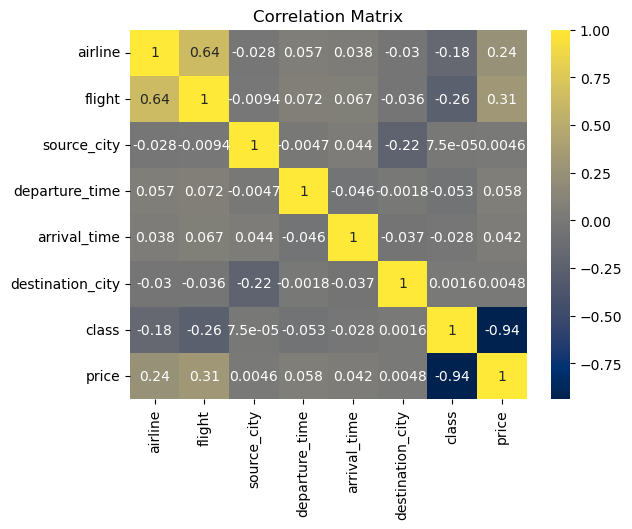

In [213]:
# I'm curious to build a heat map here and understand correlation between variables better. 
import seaborn as sns

sns.heatmap(flights.corr(), annot=True, cmap='cividis')
plt.title('Correlation Matrix')
plt.show()

In [387]:
# Looking at the heatmap, flight and airline variables have high correlation coefficient - would be interesting to explore that further. 
# let's investigate prices based on the airline we choose
results_airline = (sm.OLS.from_formula('price ~ airline', flights)).fit()
print(results_airline.params)


Intercept                4091.072742
airline[T.Air_India]    19415.946370
airline[T.GO_FIRST]      1560.934853
airline[T.Indigo]        1233.143561
airline[T.SpiceJet]      2088.206139
airline[T.Vistara]      26305.463560
dtype: float64


In [376]:
# Looks like Air India and Vistara are more pricier airlines. Let's try to determine potential price we'll pay for a ticket by Vistara.
vistara_test = (1 * results_airline.params.iloc[5] + results_airline.params.iloc[0])
vistara_test

30396.53630170694

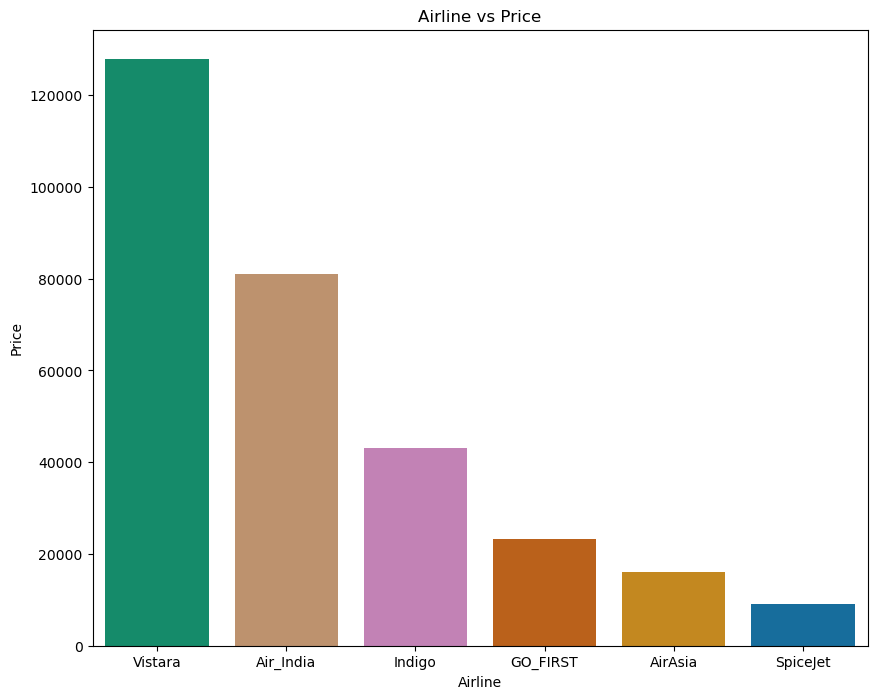

In [383]:
# Let's visualize prices per airline to understand it better. Does it fit our model?

plt.figure(figsize=(10, 8))
sns.countplot(data=flights, x='airline', hue='airline', order=flights['airline'].value_counts().index, palette='colorblind', dodge = False)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Airline vs Price')
plt.show()


In [ ]:
# Same results here. Two the most pricy airlines are Air India and Vistara.